In [1]:
import matplotlib as mpl
from matplotlib import pylab
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (25, 12),
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'}

mpl.style.use("seaborn")
pylab.rcParams.update(params)

## Recap

### Introduction
1. Any expression like $a^b = c$ describes a relationship between three numbers &ndash; a *base*, (here $a$), an exponent ($b$), and the result of the operation ($c$).
1. We have two types of function &ndash; logarithms (logs) and exponentials &ndash; for relating these quantities to each other.
1. Logarithms are functions which, given an arbitrary number and a base, return the exponent needed to raise that number to the base. For example, $\log_{10}{100} = 2$.
1. Exponential functions are the *inverse* of logarithms &ndash; they take us from a given pair of base and exponent to the result of exponentiation: ${2^{10} = 1024}$.


### Conventions
1. We write the base of a log function as a subscript: ${\log_3(x)}$ is the logarithm to base 3.
1. "Log" can refer to either the *natural* log (to base *e*, Euler's number) or to the base-ten log (${\log_{10}}$).
1. Euler's number is a special mathematical constant that appears in a lot of contexts. Like $\pi$, it's a *transcendental* number, meaning it's irrational (like a surd, or an irrational root, it can't be written as a ratio $\frac{a}{b}$ for any integers $a$ and $b$), but it's also unlike surds in that it is not the root of any polynomial with rational coefficients. Its value is about 2.72.
1. In mathematical notation, the natural logarithm (commonly just *the* logarithm function) is most commonly written as ${\log}$, but other fields such as engineering often write it as ${\ln}$ to avoid confusion. Ten is a more widely used base in applied fields, so $\log_{10}$ is the type of logarithm most encountered there.
1. Likewise, there is a natural exponential, ${\exp(x)}$ or ${\mathrm{e}^x}$, which uses Euler's number as the base. This is often referred to as *the* exponential function.


### Definitions
1. The exponential function maps the whole real line (${\mathbb{R}}$, *i.e.* its domain or set of possible input values) onto the set of real numbers greater than zero (${\mathbb{R}_{> 0}}$, the codomain, range, or set of possible output values). This means that the exponential of a real number can never be zero or negative.
1. Similarly, the logarithm has as its domain ${\mathbb{R}_{> 0}}$, and codomain ${\mathbb{R}}$ (note that we swap these around from exponential because they're just inverse functions) &ndash; a log function can map any positive real number onto any real number, but the log of a zero or negative number is not defined.
1. If we're just working in real numbers, the only acceptable bases are strictly positive reals (${\mathbb{R}_{>0}}$), excluding 1 for logarithms. For exponentials, ${y = 1^x}$ is the trivial case, a constant function.

## Laws of exponentials and logarithms

A handful of key rules allow you to manipulate most basic expressions involving logarithms and exponentials. For example:

#### Logarithms (regardless of base)
1. ${\log(ab) = \log(a) + \log(b)}$
1. ${\log(\frac{a}{b}) = \log(a) - \log(b)}$
1. ${\log(a^b) = b\log(a)}$


#### Exponentials
1. ${a^x a^y = a^{x+y}}$
1. ${\frac{a^x}{a^y} = a^{x-y}}$
1. ${(ab)^y = a^y b^y}$
1. ${(\frac{a}{b})^y = \frac{a^y}{b^y}}$
1. ${(a^x)^y = a^{xy}}$ &dagger;
1. ${a^{-x} = \frac{1}{a^x}}$
1. ${a^{\frac{x}{y}} = \sqrt[y](x)}$
1. ${a^0 = 1 \;\; \forall a \neq 0}$ &ndash; but by convention, ${0^0}$ is often agreed (defined) to be 1.

&dagger; Don't write ${a^{x^y}}$, because of order of operations. Exponentials are right-associative, so ${2^{3^2}}$ is ${2^9 = 512}$, not ${8^2 = 64}$.

#### Change of base
1. ${\log_b(x) = \frac{\log_a(x)}{\log_a(b)} }$
1. ${a^b = \exp(b\log(a))}$, since $\exp$ and $\log$ are inverse functions and ${\log(a^b) = b\log(a)}$.

Note that these last two identities allow us to rewrite any expression involving exponentials or logarithms (to whatever bases) purely in terms of the natural log and exp functions (or in terms of any other base).

### Proof of change of base formula

Define:
$$
\begin{align*}
y &= \log_{b}{x} \Leftrightarrow x = b^y \\
z &= \log_{a}{x} \Leftrightarrow x = a^z
\end{align*}
$$

Thus:
$$
\begin{align*}
z &= \log_a(b^y) \\
  &= \log_a{b} \\
  &= \log_b{x} \log_a{b}
\end{align*}
$$



## Plotting

#### Notes
1. Remeber that log and exp are inverse functions; for a given base, you can easily interchange between plots of one and the other by inverting the x- and y-axes (reflection in ${y=x}$).
1. The usual rules for transformations of plotted functions apply here as elsewhere, *e.g.* replacing $x$ as the argument of a log with $x+1$ has the result of shifting the plot one unit to the left. For simplicity we just consider the effect of changing the base.

In [2]:
def change_log_base(base, maxval=10):
    xs = np.arange(0.01, maxval, 0.01)
    plt.plot(xs, np.log(xs) / np.log(base), label=f'Base {str(base)}')
    plt.title('Comparing different log functions')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.hlines(y=0, xmin=min(xs), xmax=max(xs))

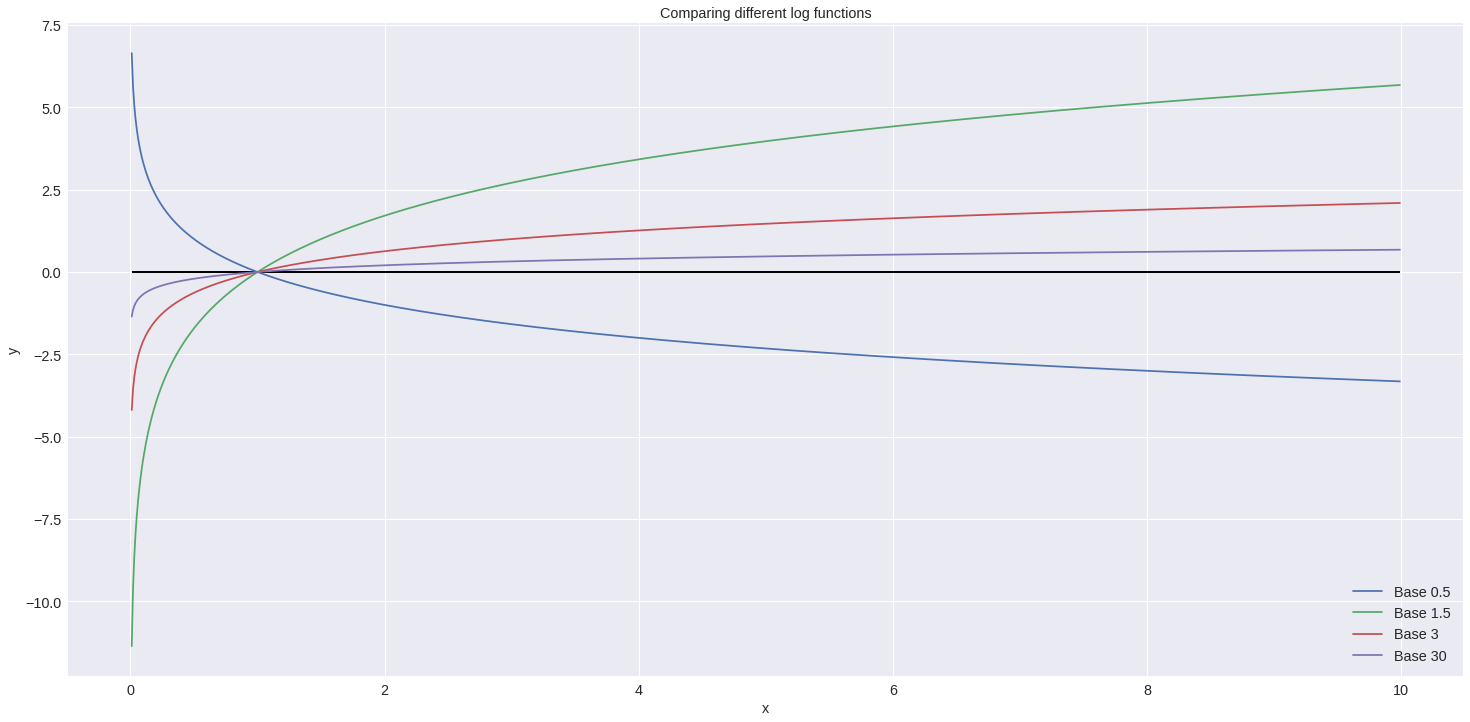

In [3]:
for i in [0.5, 1.5, 3, 30]:
    change_log_base(i)

In [4]:
def change_exp_base(base, minval=-4, maxval=4):
    xs = np.arange(minval, maxval+1, 0.1)
    ys = np.power(base, xs)
    plt.plot(xs, ys, label=f'$y={base}^x$')
    plt.title('Comparing different exp functions')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.hlines(y=0, xmin=min(xs), xmax=max(xs))
    plt.vlines(x=0, ymin=min(ys), ymax=max(ys))

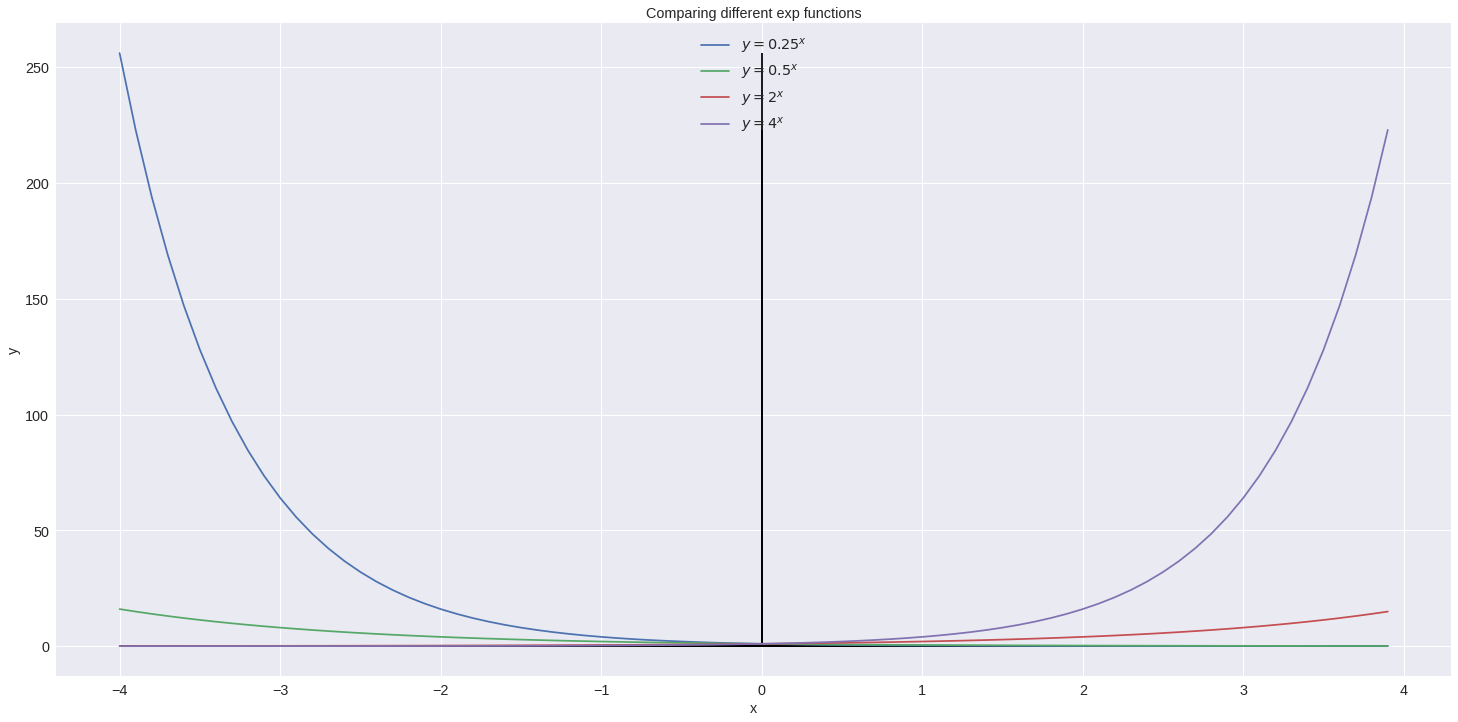

In [5]:
for i in [0.25, 0.5, 2, 4]:
    change_exp_base(i, maxval=3)

### Observations

1. As expected, interchanging log and exp for the same base is equivalent to interchanging y and x.
1. All curves of the form ${y=log_{a}(x)}$ contain the point ${(1, 0)}$.
1. Similarly, ${y=a^x}$ always contains the point ${(0, 1)}$.
1. Plots of logs to bases less than one appear as the "flipped" version of their reciprocal base. ${y=\log_{1/2}(x)}$ is just ${y=\log_{2}(x)}$ flipped around the x-axis.
1. Similarly for exponentials to bases less than one, which are flipped around the y-axis.
1. This "flipping" of signs comes about because a reciprocal is equivalent to a negative power: ${\exp(1/x) = \exp(x^{-1}) = \exp(-x)}$, and ${\log(1/x) = \log(x^{-1}) = -\log(x)}$.
1. It looks like exponentials to different bases are the same function subject to gradient-changing transformations, and likewise for logs. This is what we'd expect, looking at the laws above.

### Examples and interpretation
1. Any natural process in which, for a fixed period of time, a given property changes by a constant *factor*, is growing or decaying exponentially. If it changes by a constant *amount* in a fixed period of time, that is arithmetic growth.
1. In differential notation, we can say that an exponentially decaying system (say a population ${N(t)}$, considered as a function of time) satisfies ${\frac{\mathrm{d}N(t)}{\mathrm{d}t} = -\lambda N(t)}$, where ${\lambda > 0}$. Meaning, the rate at which activity is decreasing at a given time is determined by the population at that time, and a constant which is an intrinsic property of the system.
1. This is a very common property of physical systems &ndash; exponentially growing and decaying quantities appear in every scientific field.
1. The classic example is radioactive decay: the activity (number of particles still able to decay) remaining at time $t$ is given by ${N(t) = N_0 \exp(-\lambda t)}$, where $N_0$ is the initial population of active particles and $\lambda$ is the decay constant. This has units of inverse time &ndash; the proportion that decays in e units of time, or equivalently the probability of a given particle decaying in e units of time.
1. Remember we can change bases &ndash; so if a fixed time corresponds to a change in activity by a factor of ${\frac{1}{\rm e}}$, you can show that the activity halves every interval of ${t_{1/2} = \frac{\log{2}}{\lambda}}$ seconds.
1. Another common example is that a lot of things are logarithmically distributed, such as languages by speakers. There are about 6000 languages, and the vast of them are spoken by tiny populations of people, while a tiny minority of languages are spoken by over 100 million people.
1. Log plots (almost always to base ten) are commonly used to show data measured at very different orders of magnitude &ndash; on a log axis, a constant distance corresponds to a constant factor (rather than a constant difference, as on a linear plot). Log-log and log-linear (both or just axes logs) are common. This also has the advantage of making exponential data easier to read, since a plot of an exponential on a log axis is just a line.

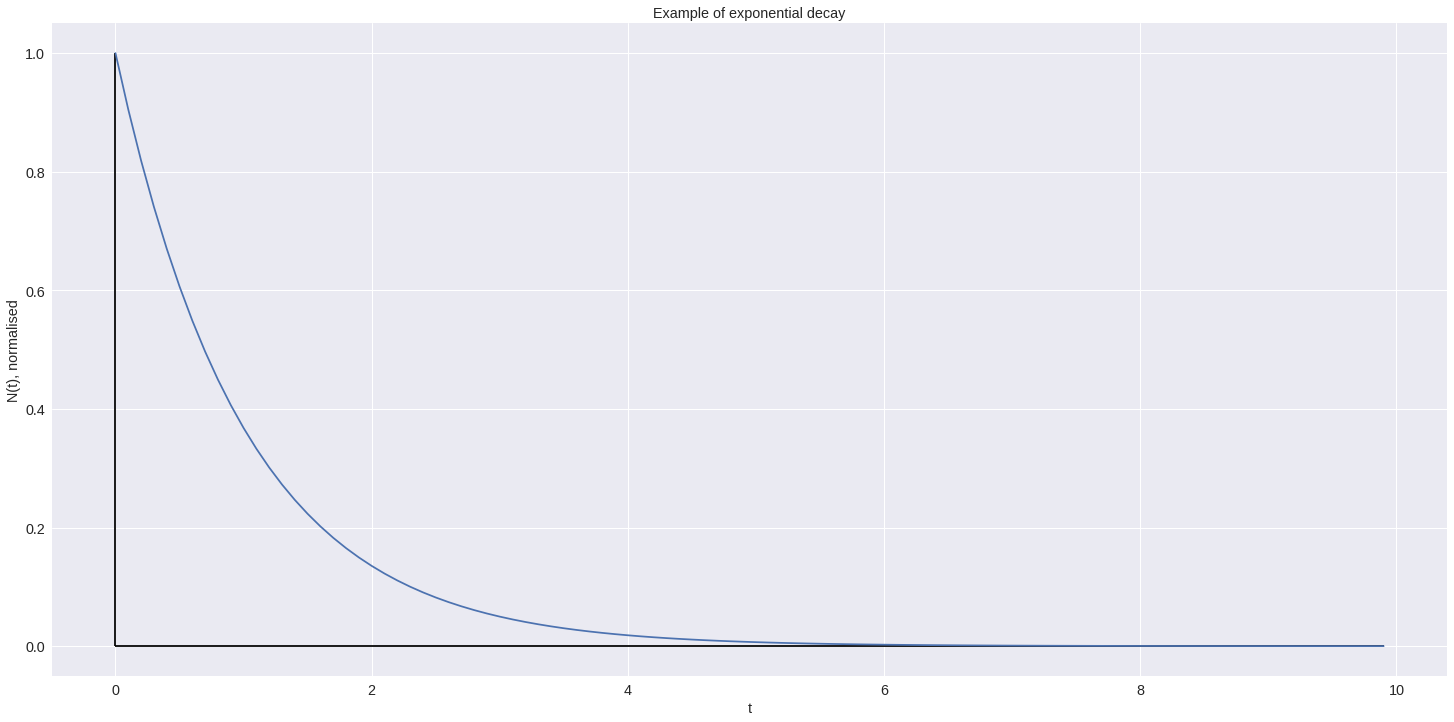

In [49]:
xs = np.arange(0, 10, 0.1)
ys = np.exp(-1*xs)
plt.plot(xs, ys, label=None)
plt.title('Example of exponential decay')
plt.xlabel('t')
plt.ylabel('N(t), normalised')
plt.hlines(y=0, xmin=min(xs), xmax=max(xs))
plt.vlines(x=0, ymin=min(ys), ymax=max(ys));

### Example of log scales

Note how exponential functions are transformed on a log-linear scale (each tick increment on the y-axis corresponds to a factor of 10) &ndash; the exponential of a linear function is plotted as a line, with gradient corresponding to its base. Polynomials now look like log functions to different bases!

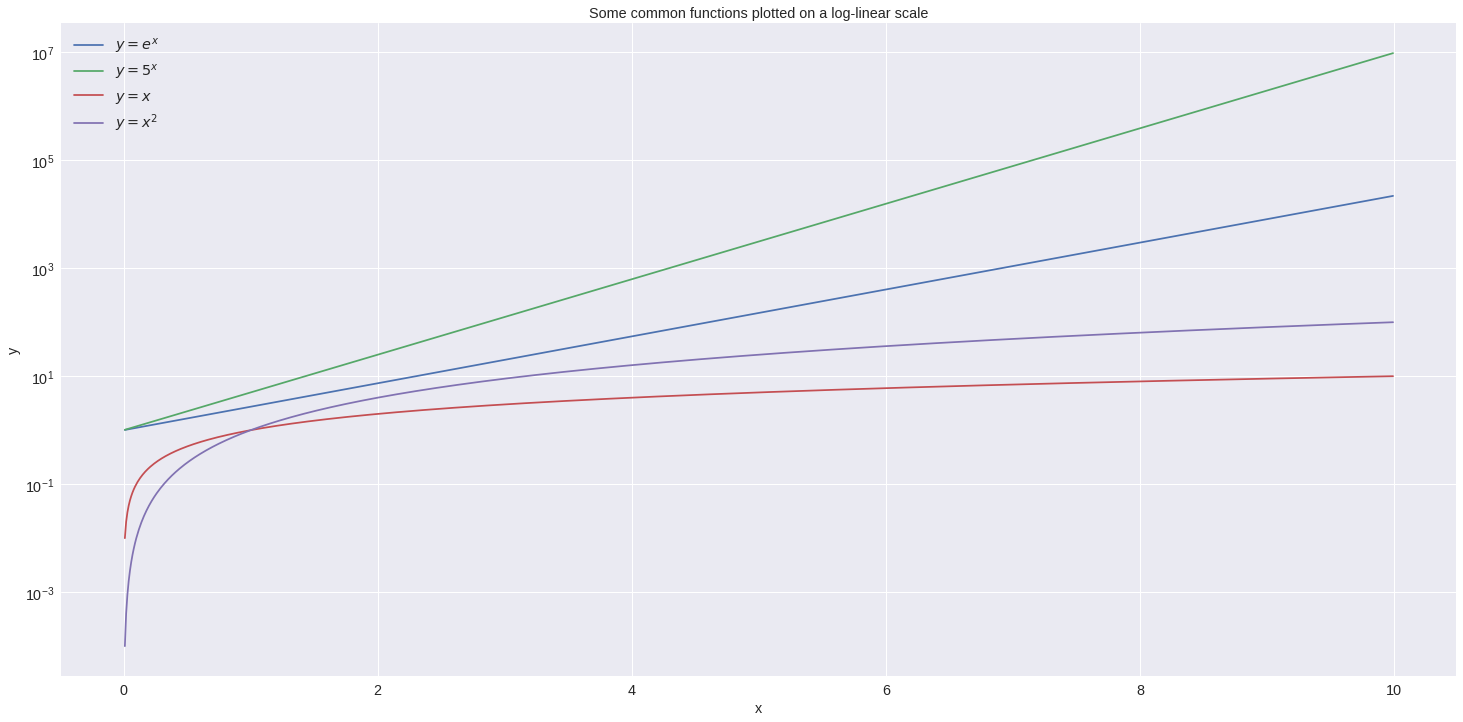

In [39]:
fig = plt.figure()
ax = fig.gca()
xs = np.arange(0.01, 10, 0.01)
ax.plot(xs, np.exp(xs), label='$y = e^x$')
ax.plot(xs, np.power(5, xs), label='$y = 5^x$')
ax.plot(xs, xs, label='$y = x$')
ax.plot(xs, np.power(xs, 2), label='$y = x^2$')
ax.set_title('Some common functions plotted on a log-linear scale')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_yscale('log')
ax.legend()
ax.hlines(y=0, xmin=min(xs), xmax=max(xs));

### Some more examples

As you'd expect, an exponential decay is just a line with negative gradient. Similarly for an exponential of a higher-order polynomial &ndash; the survival fraction of tumour cells as a function of the number of fractions of delivered radiotherapy has the functional form shown below, an exponentiated negative quadratic. When we plot this against a log axis, the quadratic shape becomes apparent.

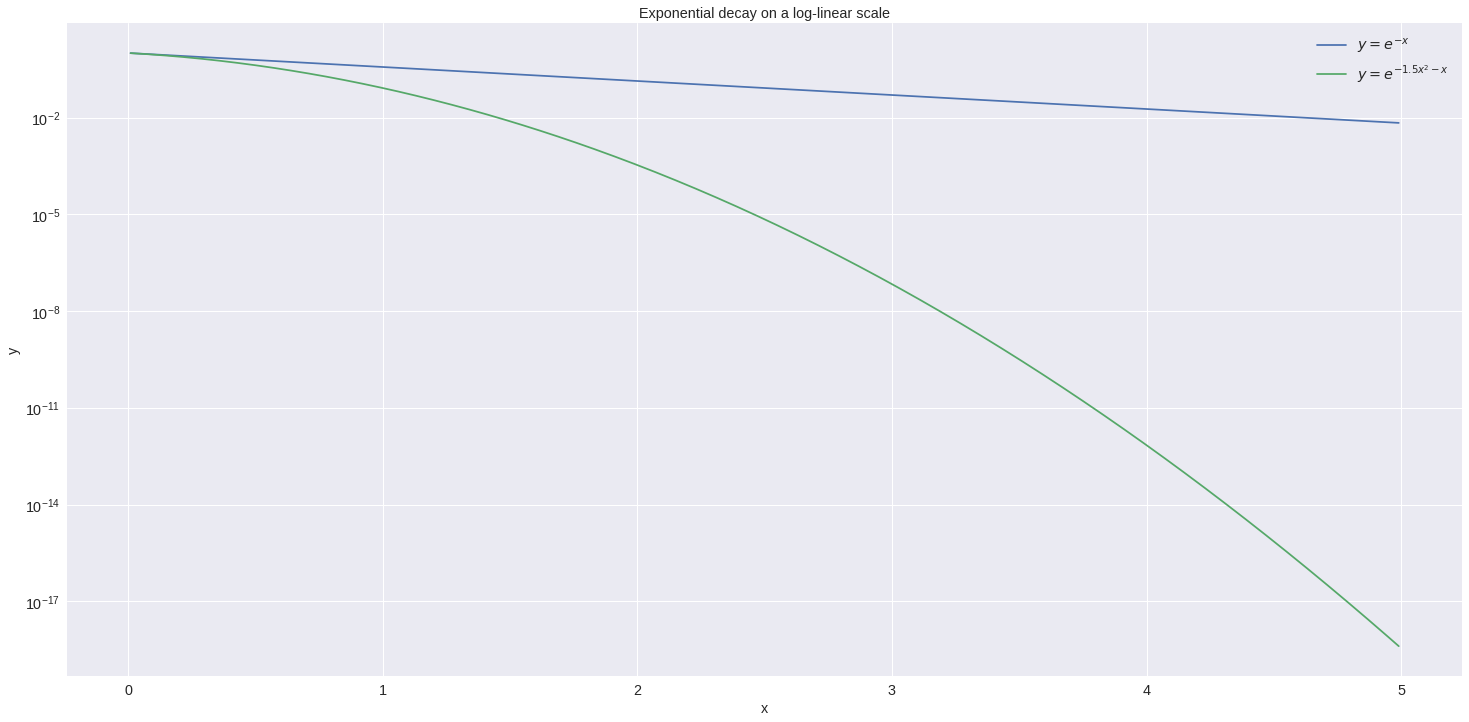

In [48]:
fig = plt.figure()
ax = fig.gca()
xs = np.arange(0.01, 5, 0.01)
ax.plot(xs, np.exp(-1*xs), label='$y = e^{-x}$')
ax.plot(xs, np.exp(-1.5 * np.power(xs, 2) - xs), label='$y = e^{-1.5 x^{2} - x}$')
ax.set_title('Exponential decay on a log-linear scale')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_yscale('log')
ax.legend()
ax.hlines(y=0, xmin=min(xs), xmax=max(xs));